In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pykalman import KalmanFilter

In [2]:
file_path = '/Users/annapham/Downloads/FilteredDailyMood.xlsx'

In [3]:
df = pd.read_excel(file_path)

In [4]:
# Filter the df for user_name 'bawtpe'
patient_df = df[df['user_name'] == 'bawtpe']
display(patient_df)

,user_name,day,depressedMood,fatigue,fidgeting,increasedEnergy,rapidSpeech,irritability,sex,age,arm,time
0,bawtpe,1,1.0,1.0,1.0,2.0,2.0,1.0,-0.531915,-1.189362,0.489362,-0.476190
1,bawtpe,2,NaN,NaN,NaN,NaN,NaN,NaN,-0.531915,-1.189362,0.489362,-0.452381
2,bawtpe,3,1.0,0.5,0.0,1.0,0.0,0.0,-0.531915,-1.189362,0.489362,-0.428571
3,bawtpe,4,NaN,NaN,NaN,NaN,NaN,NaN,-0.531915,-1.189362,0.489362,-0.404762
4,bawtpe,5,0.5,1.5,0.0,0.0,0.0,1.0,-0.531915,-1.189362,0.489362,-0.380952
5,bawtpe,6,NaN,NaN,NaN,NaN,NaN,NaN,-0.531915,-1.189362,0.489362,-0.357143
6,bawtpe,7,NaN,NaN,NaN,NaN,NaN,NaN,-0.531915,-1.189362,0.489362,-0.333333
7,bawtpe,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.531915,-1.189362,0.489362,-0.309524
8,bawtpe,9,1.0,1.0,0.0,0.0,0.0,0.0,-0.531915,-1.189362,0.489362,-0.285714
9,bawtpe,10,1.0,1.0,0.0,1.0,0.0,0.0,-0.531915,-1.189362,0.489362,-0.261905


In [5]:
rating_cols = [
    "depressedMood",
    "fatigue",
    "fidgeting",
    "increasedEnergy",
    "rapidSpeech",
    "irritability"
]

patient_data = patient_df[rating_cols]
display(patient_data)

,depressedMood,fatigue,fidgeting,increasedEnergy,rapidSpeech,irritability
0,1.0,1.0,1.0,2.0,2.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.5,0.0,1.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.5,1.5,0.0,0.0,0.0,1.0
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,1.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,1.0,0.0,0.0


In [6]:
# Convert the patient_data DataFrame to a NumPy array
M = patient_data.to_numpy()
print("Shape of array M:", M.shape)

Shape of array M: (42, 6)


In [7]:
# Convert NaNs to masked values
M_masked = np.ma.masked_invalid(M) 

T, obs_dim = M.shape
latent_dim = 2

In [8]:
# Initial model parameters 
latent_dim = 2
obs_dim = 6

F0 = np.array([[0.5, 0.0],   # B
               [0.0, 0.5]])

H0 = np.array([[1.0, 0.0],   # A
               [1.0, 0.0],
               [1.0, 0.0],
               [0.0, 1.0],
               [0.0, 1.0],
               [0.5, 0.5]])

Q0 = 0.01 * np.eye(latent_dim)  # Gamma
R0 = 0.1  * np.eye(obs_dim)     # Sigma
x0 = np.zeros(latent_dim)
P0 = np.eye(latent_dim)

In [9]:
# Kalman Filter setup
kf = KalmanFilter(
    transition_matrices=F0,
    observation_matrices=H0,
    transition_covariance=Q0,
    observation_covariance=R0,
    initial_state_mean=x0,
    initial_state_covariance=P0,
    em_vars=[
        'transition_matrices',
        'observation_matrices',
        'transition_covariance',
        'observation_covariance'
    ]
)

In [10]:
# EM loop 
max_iter = 100
tol = 1e-3
loglikelihoods = []
prev_ll = -np.inf

for i in range(max_iter):
    kf = kf.em(M_masked, n_iter=1)
    ll = kf.loglikelihood(M_masked)
    loglikelihoods.append(ll)

    if abs(ll - prev_ll) < tol:
        print(f"Converged at iteration {i+1})")
        break
    prev_ll = ll
else:
    print("Did not converge within given iterations.")


Did not converge within given iterations.


In [11]:
# Estimation
U_filt, _ = kf.filter(M_masked)
U_smooth, _ = kf.smooth(M_masked)

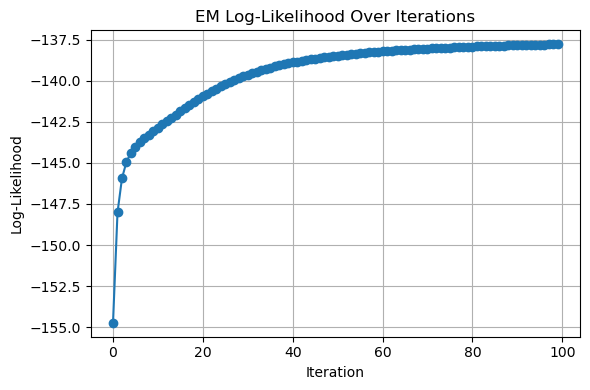

In [12]:
# Plot log-likelihood 
plt.figure(figsize=(6, 4))
plt.plot(loglikelihoods, marker='o')
plt.title("EM Log-Likelihood Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()

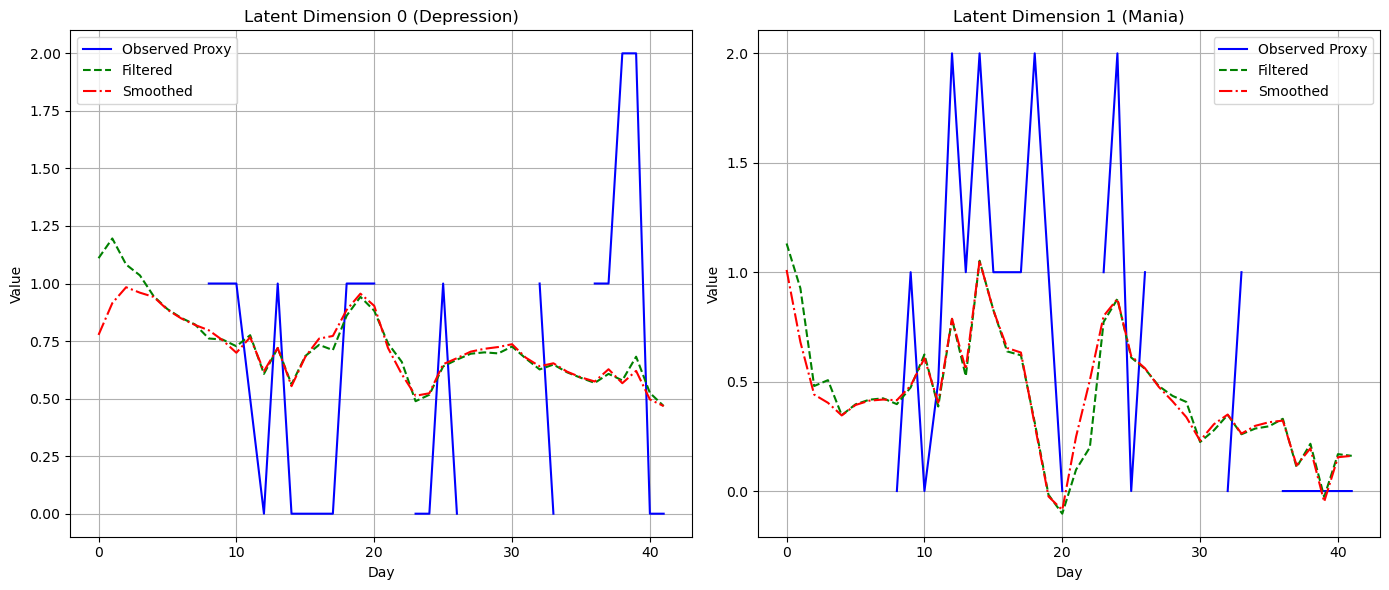

In [13]:
# Plot latent states 
proxy = {
    0: M[:, 0],  # depressedMood
    1: M[:, 3],  # increasedEnergy
}
labels = {0: "Depression", 1: "Mania"}

plt.figure(figsize=(14, 6))
for d in range(latent_dim):
    plt.subplot(1, 2, d+1)
    plt.plot(proxy[d], 'b-', label="Observed Proxy")
    plt.plot(U_filt[:, d], 'g--', label="Filtered")
    plt.plot(U_smooth[:, d], 'r-.', label="Smoothed")
    plt.title(f"Latent Dimension {d} ({labels[d]})")
    plt.xlabel("Day")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

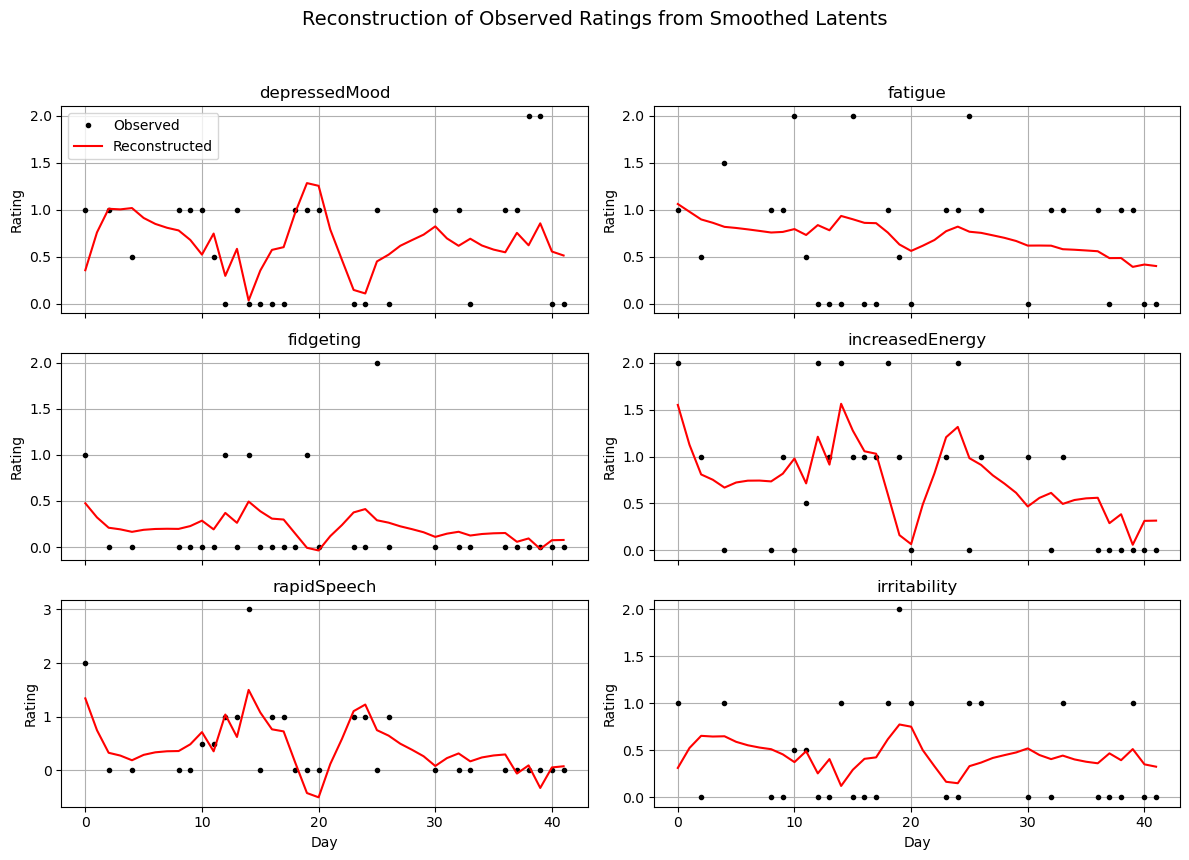

In [14]:
# Plot reconstruction 
M_recon = (kf.observation_matrices @ U_smooth.T).T
fig, axes = plt.subplots(3, 2, figsize=(12, 9), sharex=True)
fig.suptitle("Reconstruction of Observed Ratings from Smoothed Latents", fontsize=14)

for i, ax in enumerate(axes.ravel()):
    ax.plot(M[:, i], 'ko', label="Observed", markersize=3)
    ax.plot(M_recon[:, i], 'r-', label="Reconstructed")
    ax.set_title(rating_cols[i])
    ax.set_ylabel("Rating")
    ax.grid(True)
    if i >= 4:
        ax.set_xlabel("Day")
    if i == 0:
        ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [15]:
# Print learned parameters (rounded)
print("\n=== Learned Parameters ===")

print("A:\n", np.round(kf.observation_matrices, 2))
print("B:\n", np.round(kf.transition_matrices, 2))
print("Sigma:\n", np.round(kf.observation_covariance, 2))
print("Gamma:\n", np.round(kf.transition_covariance, 2))


=== Learned Parameters ===
A:
 [[ 1.32 -0.67]
 [ 0.67  0.53]
 [ 0.    0.47]
 [ 0.21  1.38]
 [-0.4   1.64]
 [ 0.8  -0.31]]
B:
 [[0.86 0.21]
 [0.19 0.64]]
Sigma:
 [[ 0.28  0.12  0.04 -0.06 -0.02 -0.  ]
 [ 0.12  0.39  0.02 -0.15 -0.18  0.07]
 [ 0.04  0.02  0.21  0.02  0.04  0.13]
 [-0.06 -0.15  0.02  0.32  0.1   0.08]
 [-0.02 -0.18  0.04  0.1   0.23  0.1 ]
 [-0.    0.07  0.13  0.08  0.1   0.26]]
Gamma:
 [[ 0.01 -0.02]
 [-0.02  0.05]]
